In [1]:
import random
from scipy.stats import gmean
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D   
from matplotlib import cm
import matplotlib.patches as patches
from scipy.stats import erlang
import sys
import os
sys.path.append("..")
sys.path.append(
    os.path.join(os.path.dirname(os.path.abspath('__file__')), 'src')
)
from src.PopulationDynamicsModel import *

plt.rcParams['figure.figsize']    = [4,3]
plt.rcParams['font.size']         = 12
plt.rcParams["axes.labelcolor"]   = "#000000"
plt.rcParams["axes.linewidth"]    = 1.0 
plt.rcParams["xtick.major.width"] = 1.0
plt.rcParams["ytick.major.width"] = 1.0

# Figure2

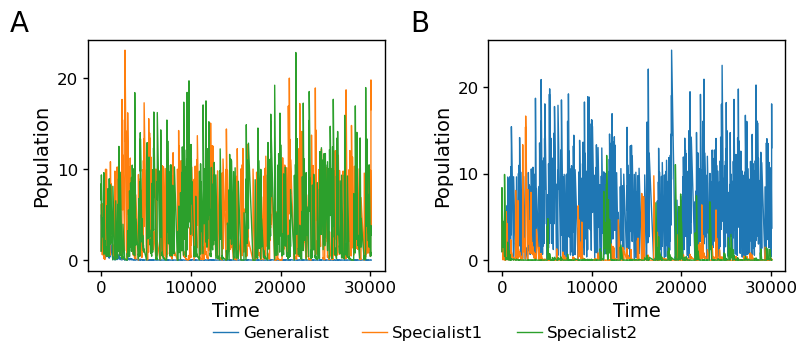

In [5]:
random.seed(100)
np.random.seed(100)
env_change_num=300
tauList = erlang.rvs(a = 2,scale = 50,size=env_change_num)
n = 3
E = 2
A = np.zeros((n,n))

p = 10**(-4)
for i in range(n):
    for j in range(n):
        if abs(i-j)==1:
                A[i,j] = p
        else:
            A[i,j] = 0
for i in range(n):
    A[i,i] = 1 - sum(A[i,:])
a = 0.01
b=1
mu = np.zeros((n,E))
gamma = np.zeros((n,E))
p = 0
for i in range(n):
    p = i-n//2
    mu[i] = np.array([(2)**(p),(2)**(-p)])*(0.4)
    #v[i] = np.array([(2+p/2),(2-p/2)])*(0.1)
#gamma = a*np.exp(b*v)/(1+np.exp(0.5/v))
gamma = a*np.exp(b*v)
X_0 = np.zeros(n)
for i in range(n):
    X_0[i] = 1
N,t,N_mean,tau_course = Simulation(n, E, mu, gamma, A, X_0, 10, tauList, env_change_num,threshold=10**(-8))
 
random.seed(100)
np.random.seed(100)
A = np.zeros((n,n))

p = 10**(-4)
for i in range(n):
    for j in range(n):
        if abs(i-j)==1:
                A[i,j] = p
        else:
            A[i,j] = 0
            
for i in range(n):
    A[i,i] = 1 - sum(A[i,:])
a = 0.01
b=1
tau = 100
v = np.zeros((n,E))
gamma = np.zeros((n,E))
p = 0
for i in range(n):
    p = i-n//2
    v[i] = np.array([(2)**(p),(2)**(-p)])*(0.8)
    #v[i] = np.array([(2+p/2),(2-p/2)])*(0.1)
gamma = a*np.exp(b*v)
X_0 = np.zeros(n)
for i in range(n):
    X_0[i] = 1
N2,t2,N_mean,tau_course = Simulation(n, E, mu, gamma, A, X_0, 10, tauList, env_change_num,threshold=10**(-8))

fig, ax = plt.subplots(1, 2, figsize=(9,3))
plt.subplots_adjust(wspace=0.35)

ax[0].plot(t,N[:,1], linewidth=1)
ax[0].plot(t,N[:,0], linewidth=1)
ax[0].plot(t,N[:,2], linewidth=1)
ax[1].plot(t2,N2[:,1], linewidth=1)
ax[1].plot(t2,N2[:,0], linewidth=1)
ax[1].plot(t2,N2[:,2], linewidth=1)
ax[0].set_title("A",fontsize=20, x=-0.23,y=1.0)
ax[1].set_title("B",fontsize=20, x=-0.23,y=1.0)
for i in range(2):
    ax[i].set_yticks([0,10,20])
    ax[i].set_xlabel("Time",fontsize=14)
    ax[i].set_ylabel("Population",fontsize=14)
fig.legend(["Generalist","Specialist1","Specialist2"],loc='upper center',bbox_to_anchor=(0.5,-0.05),borderaxespad=0,frameon=False,fontsize=12,handletextpad=0.3,ncol=3,handlelength=1.5)


# シミュレーション: $N=3,E=2,\Delta\tau=100$

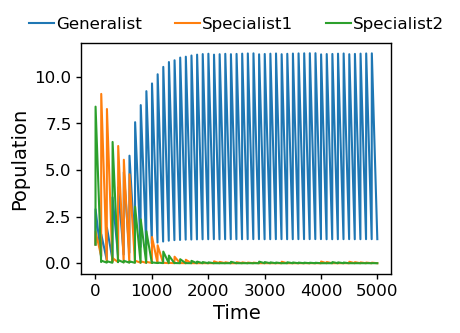

In [5]:
random.seed(100)
np.random.seed(100)

env_change_num=50
tauList = np.full(env_change_num,100)

n = 3
E = 2
A = np.zeros((n,n))

p = 10**(-4)
for i in range(n):
    for j in range(n):
        if abs(i-j)==1:
                A[i,j] = p
        else:
            A[i,j] = 0
for i in range(n):
    A[i,i] = 1 - sum(A[i,:])

a = 0.01
b=1


mu = np.zeros((n,E))
mu_mean = 0.8
gamma = np.zeros((n,E))

for i in range(n):
    p = i-n//2
    mu[i] = np.array([(2)**(p),(2)**(-p)])*(mu_mean)
gamma = a*np.exp(b*mu)

X_0 = np.zeros(n)
for i in range(n):
    X_0[i] = 1

N,t,N_mean,tau_course = Simulation(n, E, mu, gamma, A, X_0, 10, tauList, env_change_num,threshold=10**(-8))

#結果の描画
plt.figure(figsize=(4,3))
#plt.plot(t,N[:,1])
plt.plot(t,N[:,1])
plt.plot(t,N[:,0])
plt.plot(t,N[:,2])
plt.xlabel("Time",fontsize=14)
plt.ylabel("Population",fontsize=14)
plt.legend(["Generalist","Specialist1","Specialist2"],loc='lower center',bbox_to_anchor=(0.5,1.02),borderaxespad=0,frameon=False,fontsize=12,handletextpad=0.1,ncol=3,handlelength=1.5)

plt.show()


# 平均値をとる($\Delta\tau$一定, $\bar{\mu}$)

In [3]:
random.seed(100)
np.random.seed(100)

env_change_num=500
tauList = np.full(env_change_num,100)

g = []
gv = []
s1 = []
s2 = []
s2v = []
n=3
E = 2
A = np.zeros((n,n))
a = 0.01
b=1
tau = 100
p = 10**(-4)
for i in range(n):
    for j in range(n):
        if i==j:
            if i!=0 and i!=n-1:
                A[i,j] = 1 - 2 * p
            else:
                A[i,j] = 1 - p
        elif abs(i-j)==1 :
                A[i,j] = p
        else:
            A[i,j] = 0
ratio = []
mu_mean_list = np.array([0.2+0.02*t for t in range(30)])

for t in range(30):
    sample_g = []
    sample_s = []
    for _ in range(10):
        mu = np.zeros((n,E))
        for i in range(n):
            p = i-n//2
            mu[i] = np.array([(2)**(p),(2)**(-p)])*mu_mean_list[t]
            
        gamma = a*np.exp(b*mu)
        X_0 = np.zeros(n)
        for i in range(n):
            X_0[i] = 1
        
        N,_,N_mean,tau_course = Simulation(n, E, mu, gamma, A, X_0, 10, tauList, env_change_num,threshold=10**(-8))
        nm = np.array(tau_course[-300:-1])@N_mean[-300:-1,:]/sum(tau_course[-300:-1])
        rg = (mu[1][0]+mu[1][1])/(gamma[1][0]+gamma[1][1])
        rs = (mu[0][0]+mu[0][1])/(gamma[0][0]+gamma[0][1])
        sample_g.append(nm[1])
        sample_s.append((nm[0]+nm[2])/2)
    g.append(np.mean(sample_g))
    gv.append(np.std(sample_g, ddof=1))
    s2.append(np.mean(sample_s))
    s2v.append(np.std(sample_s, ddof=1))
    #ratio.append(rg/rs)
#結果の描画

plt.errorbar(mu_mean_list, g, yerr = gv, capsize=5, fmt='o',c = "tab:blue")
plt.errorbar(mu_mean_list, s2, yerr = s2v, capsize=5,fmt='o',c = "tab:orange")


plt.xlabel(r"$\bar{\mu}$")
plt.yscale("log")
plt.ylabel("Avg. Population")
plt.legend(["Generalist","Specialist"],frameon=False,fontsize=10,loc = "center left",borderaxespad=0,handletextpad=0.1)
plt.show()


KeyboardInterrupt: 

# 平均値をとる($\Delta\tau$一定, $b$)

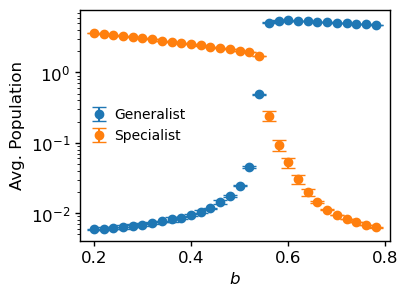

In [16]:
random.seed(100)
np.random.seed(100)

env_change_num=500
tauList = np.full(env_change_num,100)

g = []
gv = []
s1 = []
s2 = []
s2v = []
n=3
E = 2
A = np.zeros((n,n))
a = 0.01

tau = 100
p = 10**(-4)
for i in range(n):
    for j in range(n):
        if i==j:
            if i!=0 and i!=n-1:
                A[i,j] = 1 - 2 * p
            else:
                A[i,j] = 1 - p
        elif abs(i-j)==1 :
                A[i,j] = p
        else:
            A[i,j] = 0
ratio = []
b_mean_list = np.linspace(0.5,2.0,30)

for t in range(30):
    sample_g = []
    sample_s = []
    for _ in range(10):
        mu = np.zeros((n,E))
        for i in range(n):
            p = i-n//2
            mu[i] = np.array([(2)**(p),(2)**(-p)])*0.4
        b = b_mean_list[t]
        gamma = a*np.exp(b*mu)
        X_0 = np.zeros(n)
        for i in range(n):
            X_0[i] = 1
        
        N,_,N_mean,tau_course = Simulation(n, E, mu, gamma, A, X_0, 10, tauList, env_change_num,threshold=10**(-8))
        nm = np.array(tau_course[-300:-1])@N_mean[-300:-1,:]/sum(tau_course[-300:-1])
        rg = (mu[1][0]+mu[1][1])/(gamma[1][0]+gamma[1][1])
        rs = (mu[0][0]+mu[0][1])/(gamma[0][0]+gamma[0][1])
        sample_g.append(nm[1])
        sample_s.append((nm[0]+nm[2])/2)
    g.append(np.mean(sample_g))
    gv.append(np.std(sample_g, ddof=1))
    s2.append(np.mean(sample_s))
    s2v.append(np.std(sample_s, ddof=1))
    #ratio.append(rg/rs)
#結果の描画

plt.errorbar(mu_mean_list, g, yerr = gv, capsize=5, fmt='o',c = "tab:blue")
plt.errorbar(mu_mean_list, s2, yerr = s2v, capsize=5,fmt='o',c = "tab:orange")


plt.xlabel(r"$b$")
plt.yscale("log")
plt.ylabel("Avg. Population")
plt.legend(["Generalist","Specialist"],frameon=False,fontsize=10,loc = "center left",borderaxespad=0,handletextpad=0.1)
plt.show()


# 平均値をとる($\Delta\tau$ランダム, $\bar{\mu}$)

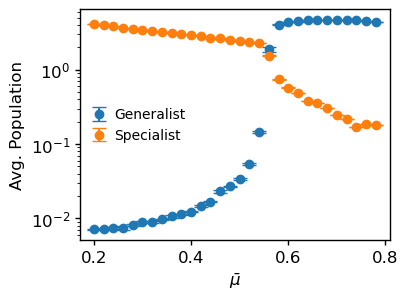

In [20]:
random.seed(100)
np.random.seed(100)

env_change_num=500
tauList = erlang.rvs(a = 2,scale = 50,size=env_change_num)

g_random = []
gv_random = []
s1_random = []
s2_random = []
s2v_random = []
n=3
E = 2
A = np.zeros((n,n))
a = 0.01
b=1
tau = 100
p = 10**(-4)
for i in range(n):
    for j in range(n):
        if i==j:
            if i!=0 and i!=n-1:
                A[i,j] = 1 - 2 * p
            else:
                A[i,j] = 1 - p
        elif abs(i-j)==1 :
                A[i,j] = p
        else:
            A[i,j] = 0
ratio = []
mu_mean_list = np.array([0.2+0.02*t for t in range(30)])

for t in range(30):
    sample_g_random = []
    sample_s_random = []
    for _ in range(10):
        mu = np.zeros((n,E))
        for i in range(n):
            p = i-n//2
            mu[i] = np.array([(2)**(p),(2)**(-p)])*mu_mean_list[t]
            
        gamma = a*np.exp(b*mu)
        X_0 = np.zeros(n)
        for i in range(n):
            X_0[i] = 1
        
        N,_,N_mean,tau_course = Simulation(n, E, mu, gamma, A, X_0, 10, tauList, env_change_num,threshold=10**(-8))
        nm = np.array(tau_course[-300:-1])@N_mean[-300:-1,:]/sum(tau_course[-300:-1])
        rg = (mu[1][0]+mu[1][1])/(gamma[1][0]+gamma[1][1])
        rs = (mu[0][0]+mu[0][1])/(gamma[0][0]+gamma[0][1])
        sample_g_random.append(nm[1])
        sample_s_random.append((nm[0]+nm[2])/2)
    g_random.append(np.mean(sample_g_random))
    gv_random.append(np.std(sample_g_random, ddof=1))
    s2_random.append(np.mean(sample_s_random))
    s2v_random.append(np.std(sample_s_random, ddof=1))
    #ratio.append(rg/rs)
#結果の描画

plt.errorbar(mu_mean_list, g_random, yerr = gv, capsize=5, fmt='o',c = "tab:blue")
plt.errorbar(mu_mean_list, s2_random, yerr = s2v, capsize=5,fmt='o',c = "tab:orange")


plt.xlabel(r"$\bar{\mu}$")
plt.yscale("log")
plt.ylabel("Avg. Population")
plt.legend(["Generalist","Specialist"],frameon=False,fontsize=10,loc = "center left",borderaxespad=0,handletextpad=0.1)
plt.show()


# 平均値をとる($\Delta\tau$ランダム, $b$)

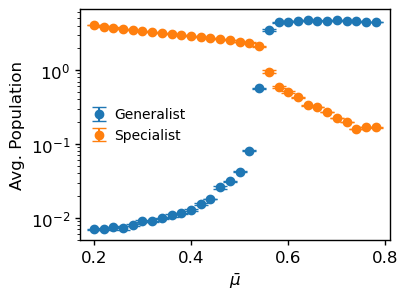

In [13]:
random.seed(100)
np.random.seed(100)

env_change_num=500
tauList = erlang.rvs(a = 2,scale = 50,size=env_change_num)

g_random = []
gv_random = []
s1_random = []
s2_random = []
s2v_random = []
n=3
E = 2
A = np.zeros((n,n))
a = 0.01

tau = 100
p = 10**(-4)
for i in range(n):
    for j in range(n):
        if i==j:
            if i!=0 and i!=n-1:
                A[i,j] = 1 - 2 * p
            else:
                A[i,j] = 1 - p
        elif abs(i-j)==1 :
                A[i,j] = p
        else:
            A[i,j] = 0
ratio = []
b_mean_list = np.linspace(0.5,2.0,30)

for t in range(30):
    sample_g_random = []
    sample_s_random = []
    for _ in range(10):
        mu = np.zeros((n,E))
        for i in range(n):
            p = i-n//2
            mu[i] = np.array([(2)**(p),(2)**(-p)])*0.4
        b = b_mean_list[t]
        gamma = a*np.exp(b*mu)
        X_0 = np.zeros(n)
        for i in range(n):
            X_0[i] = 1
        
        N,_,N_mean,tau_course = Simulation(n, E, mu, gamma, A, X_0, 10, tauList, env_change_num,threshold=10**(-8))
        nm = np.array(tau_course[-300:-1])@N_mean[-300:-1,:]/sum(tau_course[-300:-1])
        rg = (mu[1][0]+mu[1][1])/(gamma[1][0]+gamma[1][1])
        rs = (mu[0][0]+mu[0][1])/(gamma[0][0]+gamma[0][1])
        sample_g_random.append(nm[1])
        sample_s_random.append((nm[0]+nm[2])/2)
    g_random.append(np.mean(sample_g_random))
    gv_random.append(np.std(sample_g_random, ddof=1))
    s2_random.append(np.mean(sample_s_random))
    s2v_random.append(np.std(sample_s_random, ddof=1))
    #ratio.append(rg/rs)
#結果の描画

plt.errorbar(mu_mean_list, g_random, yerr = gv, capsize=5, fmt='o',c = "tab:blue")
plt.errorbar(mu_mean_list, s2_random, yerr = s2v, capsize=5,fmt='o',c = "tab:orange")


plt.xlabel(r"$\bar{\mu}$")
plt.yscale("log")
plt.ylabel("Avg. Population")
plt.legend(["Generalist","Specialist"],frameon=False,fontsize=10,loc = "center left",borderaxespad=0,handletextpad=0.1)
plt.show()


## 平均値をとる(変異率変更)

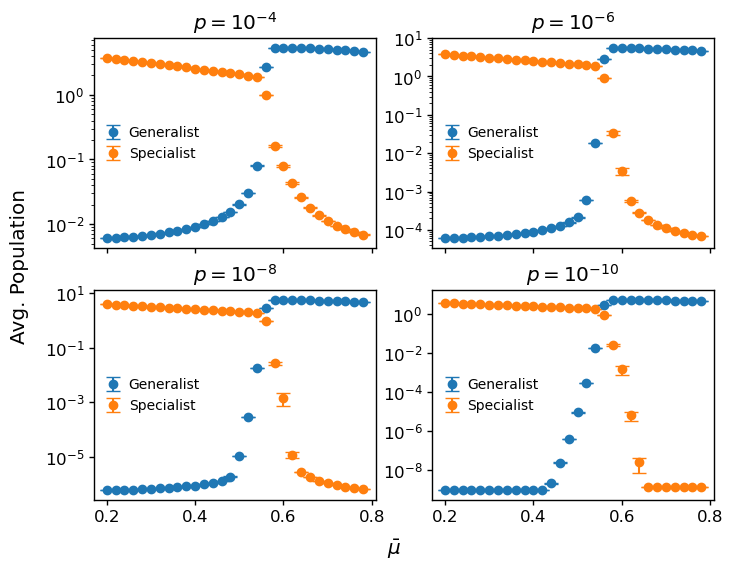

In [ ]:


env_change_num=500
tauList = np.full(env_change_num,100)
fig,ax = plt.subplots(2,2,sharex=True,sharey=False,figsize=(8,6))
ps = [10**(-4),10**(-6),10**(-8),10**(-10)]
for x in range(4):
    g = []
    gv = []
    s1 = []
    s2 = []
    s2v = []
    n=3
    E = 2
    A = np.zeros((n,n))
    a = 0.01

    tau = 100
    p = ps[x]
    for i in range(n):
        for j in range(n):
            if i==j:
                if i!=0 and i!=n-1:
                    A[i,j] = 1 - 2 * p
                else:
                    A[i,j] = 1 - p
            elif abs(i-j)==1 :
                    A[i,j] = p
            else:
                A[i,j] = 0
    ratio = []
    mu_mean_list = np.array([0.2+0.02*t for t in range(30)])

    for t in range(30):
        random.seed(100)
        np.random.seed(100)
        sample_g = []
        sample_s = []
        sample_num = 20
        for _ in range(sample_num):
            mu = np.zeros((n,E))
            for i in range(n):
                px = i-n//2
                mu[i] = np.array([(2)**(px),(2)**(-px)])*mu_mean_list[t]
            b = 1.0
            gamma = a*np.exp(b*mu)
            X_0 = np.zeros(n)
            for i in range(n):
                X_0[i] = 1
            
            N,_,N_mean,tau_course = Simulation(n, E, mu, gamma, A, X_0, 10, tauList, env_change_num,threshold=10**(-8))
            nm = np.array(tau_course[-300:-1])@N_mean[-300:-1,:]/sum(tau_course[-300:-1])
            rg = (mu[1][0]+mu[1][1])/(gamma[1][0]+gamma[1][1])
            rs = (mu[0][0]+mu[0][1])/(gamma[0][0]+gamma[0][1])
            sample_g.append(nm[1])
            sample_s.append((nm[0]+nm[2])/2)
        g.append(np.mean(sample_g))
        gv.append(np.std(sample_g, ddof=1)/ np.sqrt(sample_num))
        s2.append(np.mean(sample_s))
        s2v.append(np.std(sample_s, ddof=1)/ np.sqrt(sample_num))
        #ratio.append(rg/rs)
    #結果の描画
    pe = [r"$p=10^{-4}$",r"$p=10^{-6}$",r"$p=10^{-8}$",r"$p=10^{-10}$"][x]
    ax[x//2][x%2].set_title(pe)
    ax[x//2][x%2].errorbar(mu_mean_list, g, yerr = gv, capsize=5, fmt='o',c = "tab:blue")
    ax[x//2][x%2].errorbar(mu_mean_list, s2, yerr = s2v, capsize=5,fmt='o',c = "tab:orange")


    #ax[x//2][x%2].set_xlabel(r"$b$")
    ax[x//2][x%2].set_yscale("log")
    #ax[x//2][x%2].set_ylabel("Avg. Population")
    ax[x//2][x%2].legend(["Generalist","Specialist"],frameon=False,fontsize=10,loc = "center left",borderaxespad=0,handletextpad=0.1)
fig.supxlabel(r"$\bar{\mu}$")
fig.supylabel("Avg. Population")
plt.show()
